## Import Library

In [69]:
## Basic library
import numpy as np
import pandas as pd
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

## Visualization library
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

print ('Numpy version: ', np.__version__)
print ('Pandas version: ', pd.__version__)
print ('Seaborn version: ', sns.__version__)

Numpy version:  1.22.4
Pandas version:  1.5.3
Seaborn version:  0.12.2


In [70]:
rcParams['figure.figsize'] = (10,8)
rcParams['lines.linewidth'] = 2.5
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load dataset

In [71]:
df = pd.read_csv('/content/drive/MyDrive/FinalProject/SBAnational.csv', low_memory=False)
pd.set_option('display.max_columns', None)
df.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,4,2.0,0,0,1,0,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,2,2.0,0,0,1,0,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,180,7,1.0,0,0,1,0,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,60,2,1.0,0,0,1,0,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,240,14,1.0,7,7,1,0,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [72]:
df.shape

(899164, 27)

In [73]:
print('Jumlah row', df.shape[0])
print('Jumlah column', df.shape[1])

Jumlah row 899164
Jumlah column 27


## Cek informasi dataset

In [74]:
## Cek data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  object 
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 non-null  int64  
 16  Ur

## Data Cleansing

##### A. Cek null values

In [75]:
df.isnull().sum()

LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

In [76]:
df.isnull().sum()*100 / len(df)

LoanNr_ChkDgt         0.000000
Name                  0.001557
City                  0.003336
State                 0.001557
Zip                   0.000000
Bank                  0.173383
BankState             0.174162
NAICS                 0.000000
ApprovalDate          0.000000
ApprovalFY            0.000000
Term                  0.000000
NoEmp                 0.000000
NewExist              0.015125
CreateJob             0.000000
RetainedJob           0.000000
FranchiseCode         0.000000
UrbanRural            0.000000
RevLineCr             0.503579
LowDoc                0.287156
ChgOffDate           81.905526
DisbursementDate      0.263356
DisbursementGross     0.000000
BalanceGross          0.000000
MIS_Status            0.222095
ChgOffPrinGr          0.000000
GrAppv                0.000000
SBA_Appv              0.000000
dtype: float64

In [77]:
## Drop kolom ChgOffDate karna tidak diperlukan
df.drop(columns=['ChgOffDate'], inplace=True)

In [78]:
df.isnull().sum()

LoanNr_ChkDgt           0
Name                   14
City                   30
State                  14
Zip                     0
Bank                 1559
BankState            1566
NAICS                   0
ApprovalDate            0
ApprovalFY              0
Term                    0
NoEmp                   0
NewExist              136
CreateJob               0
RetainedJob             0
FranchiseCode           0
UrbanRural              0
RevLineCr            4528
LowDoc               2582
DisbursementDate     2368
DisbursementGross       0
BalanceGross            0
MIS_Status           1997
ChgOffPrinGr            0
GrAppv                  0
SBA_Appv                0
dtype: int64

In [79]:
df = df.dropna()

In [80]:
df.isnull().sum()

LoanNr_ChkDgt        0
Name                 0
City                 0
State                0
Zip                  0
Bank                 0
BankState            0
NAICS                0
ApprovalDate         0
ApprovalFY           0
Term                 0
NoEmp                0
NewExist             0
CreateJob            0
RetainedJob          0
FranchiseCode        0
UrbanRural           0
RevLineCr            0
LowDoc               0
DisbursementDate     0
DisbursementGross    0
BalanceGross         0
MIS_Status           0
ChgOffPrinGr         0
GrAppv               0
SBA_Appv             0
dtype: int64

##### B. Handle duplicated data

In [81]:
## Memeriksa data duplicated
df.duplicated().any()

False

##### Handle error value

In [82]:
## Ubah kolom ApprovalDate, DisbursementDate menjadi datetime

df[['ApprovalDate', 'DisbursementDate']] = df[['ApprovalDate', 'DisbursementDate']].apply(pd.to_datetime) 

In [83]:
df[['ApprovalDate', 'DisbursementDate']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 886240 entries, 0 to 899163
Data columns (total 2 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   ApprovalDate      886240 non-null  datetime64[ns]
 1   DisbursementDate  886240 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 20.3 MB


In [84]:
df[['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']].head()

,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
0,"$60,000.00",$0.00,$0.00,"$60,000.00","$48,000.00"
1,"$40,000.00",$0.00,$0.00,"$40,000.00","$32,000.00"
2,"$287,000.00",$0.00,$0.00,"$287,000.00","$215,250.00"
3,"$35,000.00",$0.00,$0.00,"$35,000.00","$28,000.00"
4,"$229,000.00",$0.00,$0.00,"$229,000.00","$229,000.00"


In [85]:
## Cleansing data curency $ dan ,
currency = ['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']
df[currency] = df[currency].applymap(lambda x: x.replace('$', '').replace(',', ''))

## Ubah kolom DisbursementGross, BalanceGross, ChgOffPrinGr, GrAppv, SBA_Appv menjadi float
df[currency] = df[currency].astype(float)

In [86]:
df[['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']].head()

,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
0,60000.0,0.0,0.0,60000.0,48000.0
1,40000.0,0.0,0.0,40000.0,32000.0
2,287000.0,0.0,0.0,287000.0,215250.0
3,35000.0,0.0,0.0,35000.0,28000.0
4,229000.0,0.0,0.0,229000.0,229000.0


In [87]:
df[['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 886240 entries, 0 to 899163
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   DisbursementGross  886240 non-null  float64
 1   BalanceGross       886240 non-null  float64
 2   ChgOffPrinGr       886240 non-null  float64
 3   GrAppv             886240 non-null  float64
 4   SBA_Appv           886240 non-null  float64
dtypes: float64(5)
memory usage: 40.6 MB


In [88]:
## Handle kolom ApprovalFY
df['ApprovalFY'].unique()

array(['1997', '1980', '2006', '1998', '1999', '2000', '2001', '1972',
       '2003', '2004', '1978', '1979', '1981', '2005', '1982', '1983',
       '1973', '1984', '2007', '1985', '1986', '1987', '2008', '1988',
       '2009', '1989', '1991', '1990', '1974', '2010', '2011', '1992',
       '1993', '2002', '2012', '2013', '1994', '2014', '1975', '1977',
       '1976', '1968', '1976A', '1969', '1995', '1970', '1996', '1971'],
      dtype=object)

In [89]:
## Hilangkan huruf A pada '1976A' lalu ubah ke int
def clean_str(x):
    if isinstance(x, str):
        return x.replace('A', '')
    return x

df['ApprovalFY']=df['ApprovalFY'].apply(clean_str).astype(int)
df['ApprovalFY'].unique()

array([1997, 1980, 2006, 1998, 1999, 2000, 2001, 1972, 2003, 2004, 1978,
       1979, 1981, 2005, 1982, 1983, 1973, 1984, 2007, 1985, 1986, 1987,
       2008, 1988, 2009, 1989, 1991, 1990, 1974, 2010, 2011, 1992, 1993,
       2002, 2012, 2013, 1994, 2014, 1975, 1977, 1976, 1968, 1969, 1995,
       1970, 1996, 1971])

In [90]:
df['NewExist'].unique()

array([2., 1., 0.])

In [91]:
## Ubah tipe data 'NewExist' menjadi int
df['NewExist'] = df['NewExist'].astype(int)

df['NewExist'].unique()

array([2, 1, 0])

In [92]:
df = df[(df['NewExist'] == 1) | (df['NewExist'] == 2)]

df.loc[(df['NewExist'] == 1), 'NewBusiness'] = 0
df.loc[(df['NewExist'] == 2), 'NewBusiness'] = 1

df['NewBusiness'] = df['NewBusiness'].astype(int)
df['NewBusiness'].unique()

array([1, 0])

In [93]:
## Ubah tipe data 'NAICS' dari numeric ke object
df['NAICS'] = df['NAICS'].astype(str)

In [94]:
## Cek data
df[['ApprovalFY', 'NewExist', 'NAICS', 'NewBusiness']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 885219 entries, 0 to 899163
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ApprovalFY   885219 non-null  int64 
 1   NewExist     885219 non-null  int64 
 2   NAICS        885219 non-null  object
 3   NewBusiness  885219 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 33.8+ MB


In [95]:
## filter value 'NewExist' hanya 1 dan 2
df = df[(df['NewExist'] == 1) | (df['NewExist'] == 2)]

## filter value 'RevLineCr' hanya Y dan N
df = df[(df.RevLineCr == 'Y') | (df.RevLineCr == 'N')]

## filter value 'LowDoc' hanya Y dan N
df = df[(df.LowDoc == 'Y') | (df.LowDoc == 'N')]

## filter value 'NAICS' yang hanya memiliki angka selain 0
df = df[df['NAICS'] != 0]

## filter value 'Term' harus > 0
df = df[df['Term'] > 0]

In [96]:
print('NewExist setelah difilter:',df['NewExist'].unique())
print('RevLineCr setelah difilter', df['RevLineCr'].unique())
print('LowDoc setelah difilter', df['LowDoc'].unique())

NewExist setelah difilter: [2 1]
RevLineCr setelah difilter ['N' 'Y']
LowDoc setelah difilter ['Y' 'N']


## Feature Encoding

In [97]:
# feature encoding 'RevLineCr' & LowDoc nilai diubah Y=1, N=0
df['RevLineCr'] = np.where(df['RevLineCr'] == 'N', 0, 1)
df['LowDoc'] = np.where(df['LowDoc'] == 'Y', 1, 0)

In [98]:
df['LowDoc'].unique()

array([1, 0])

In [99]:
df.LowDoc.unique()

array([1, 0])

In [100]:
# membuat kolom baru (default) dan mengubah nilainya menjadi deafult = 1, no deafult = 0
df['Default'] = np.where(df['MIS_Status'] == 'P I F', 0, 1)

In [101]:
df['Default'].unique()

array([0, 1])

In [102]:
df['AppvDisbursed'] = np.where(df['DisbursementGross'] == df['GrAppv'], 1, 0)

In [103]:
df['AppvDisbursed'].unique()

array([1, 0])

In [104]:
df.loc[(df['FranchiseCode'] <= 1), 'Franchise'] = 0
df.loc[(df['FranchiseCode'] > 1), 'Franchise'] = 1

In [105]:
df['Franchise'].unique()

array([0., 1.])

In [106]:
df = df.astype({'Franchise': 'int64', 'NewBusiness': 'int64', 'AppvDisbursed' :'int64' })

In [107]:
df[['Franchise', 'NewBusiness', 'AppvDisbursed']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 609617 entries, 0 to 899163
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   Franchise      609617 non-null  int64
 1   NewBusiness    609617 non-null  int64
 2   AppvDisbursed  609617 non-null  int64
dtypes: int64(3)
memory usage: 18.6 MB


In [108]:
df['DisbursementFY'] = df['DisbursementDate'].map(lambda x: x.year)

In [109]:
df['DisbursementFY'].unique()

array([1999, 1997, 1980, 1998, 2006, 2002, 2001, 2000, 2003, 1982, 2004,
       2071, 2005, 2009, 2007, 2008, 1981, 2072, 1978, 1979, 1996, 2010,
       1995, 2012, 1983, 1985, 1984, 2048, 1987, 1973, 1986, 2011, 1988,
       1989, 2013, 1990, 1991, 2014, 1992, 1993, 1994, 2020, 1974, 2028,
       1975, 1976, 1977, 2069, 2070])

## Feature Extraction

In [110]:
# membuat kolom baru (daysdisbursment) = AppDate-DisbDate
df['DaysToDisbursement'] = df['DisbursementDate'] - df['ApprovalDate']

In [111]:
df['DaysToDisbursement'] = df['DaysToDisbursement'].astype('str').apply(lambda x: x[:x.index('d') - 1]).astype('int64')

In [112]:
# Membuat kolom baru (StateSame) yang menunjukkan peminjam dan Bank berada pada state yang sama
df['StateSame'] = np.where(df['State'] == df['BankState'], 1, 0)

In [113]:
#Membuat feature SBA_AppvPct untuk melihat persentase pinjaman yang dijamin oleh SBA
df['SBA_AppvPct'] = df['SBA_Appv'] / df['GrAppv']

In [114]:
df[['SBA_Appv', 'GrAppv', 'SBA_AppvPct']].head()

,SBA_Appv,GrAppv,SBA_AppvPct
0,48000.0,60000.0,0.80
1,32000.0,40000.0,0.80
2,215250.0,287000.0,0.75
3,28000.0,35000.0,0.80
4,229000.0,229000.0,1.00


In [115]:
## Membuat kolom baru industri dengan mengambil 2 digit pertama pada kolom NAICS
df['industri'] = df['NAICS'].apply(lambda x: x[:2])

## Melakukan mapping kolom industri berdasarkan 2 digit pertama pada kolom NAICS
df['industri'] = df['industri'].map({
    '11': 'Ag/For/Fish/Hunt',
    '21': 'Min/Quar/Oil_Gas',
    '22': 'Utilities',
    '23': 'Construction',
    '31': 'Manufacturing',
    '32': 'Manufacturing',
    '33': 'Manufacturing',
    '42': 'Wholesales_trade',
    '44': 'Retail_trade',
    '45': 'Retail_trade',
    '48': 'Trans/Ware',
    '49': 'Trans/Ware',
    '51': 'Information',
    '52': 'Finance/Insurance',
    '53': 'RE/Rental/Lease',
    '54': 'Prof/Science/Tech',
    '55': 'Mgmt_comp',
    '56': 'Admin_sup/Waste_Mgmt_Rem',
    '61': 'Educational',
    '62': 'Healthcare/Social_assist',
    '71': 'Arts/Entertain/Rec',
    '72': 'Accom/Food_serv',
    '81': 'Other_no_pub',
    '91': 'Public_admin'
})
df['industri'].value_counts()

Retail_trade                80847
Construction                49154
Prof/Science/Tech           49151
Manufacturing               45471
Other_no_pub                44766
Wholesales_trade            34763
Healthcare/Social_assist    34482
Accom/Food_serv             34237
Admin_sup/Waste_Mgmt_Rem    21989
Trans/Ware                  15378
RE/Rental/Lease              9539
Arts/Entertain/Rec           9257
Ag/For/Fish/Hunt             7627
Information                  7345
Finance/Insurance            6327
Educational                  4001
Min/Quar/Oil_Gas             1352
Utilities                     434
Mgmt_comp                     119
Name: industri, dtype: int64

In [116]:
df[['industri']].isnull().sum()

industri    153378
dtype: int64

In [117]:
df.dropna(subset = ['industri'], inplace = True)

In [118]:
df[['industri']].isnull().sum()

industri    0
dtype: int64

In [124]:
df_industri = df.groupby(['industri', 'Default']).Default.count().reset_index(name='Total_default')

In [129]:
df_industri['PctIndustri'] = df_industri['Total_default']/df_industri.groupby('industri')['Total_default'].transform('sum')

In [132]:
df_industri = df_industri[df_industri['Default'] == 1]
df_industri = df_industri[['industri', 'PctIndustri']]

In [134]:
df_sort_industri = df_industri.sort_values(by='PctIndustri', ascending=False) 
df_sort_industri.head(10)

,industri,PctIndustri
13,Finance/Insurance,0.331121
29,RE/Rental/Lease,0.324772
33,Trans/Ware,0.289179
11,Educational,0.270682
17,Information,0.249966
1,Accom/Food_serv,0.249379
3,Admin_sup/Waste_Mgmt_Rem,0.248124
9,Construction,0.246287
31,Retail_trade,0.236855
7,Arts/Entertain/Rec,0.210219


In [136]:
df.merge(df_industri, on='industri', how='outer')[['industri', 'PctIndustri']].sample(5)

,industri,PctIndustri
130534,Healthcare/Social_assist,0.104605
173910,Manufacturing,0.160234
177316,Manufacturing,0.160234
421466,Admin_sup/Waste_Mgmt_Rem,0.248124
101152,Accom/Food_serv,0.249379


In [137]:
df = df.merge(df_industri, on='industri', how='outer')

In [139]:
df[['industri', 'PctIndustri']].value_counts()

industri                  PctIndustri
Retail_trade              0.236855       80847
Construction              0.246287       49154
Prof/Science/Tech         0.200627       49151
Manufacturing             0.160234       45471
Other_no_pub              0.210182       44766
Wholesales_trade          0.203147       34763
Healthcare/Social_assist  0.104605       34482
Accom/Food_serv           0.249379       34237
Admin_sup/Waste_Mgmt_Rem  0.248124       21989
Trans/Ware                0.289179       15378
RE/Rental/Lease           0.324772        9539
Arts/Entertain/Rec        0.210219        9257
Ag/For/Fish/Hunt          0.087452        7627
Information               0.249966        7345
Finance/Insurance         0.331121        6327
Educational               0.270682        4001
Min/Quar/Oil_Gas          0.087278        1352
Utilities                 0.182028         434
Mgmt_comp                 0.184874         119
dtype: int64

#### B. Handling outliers

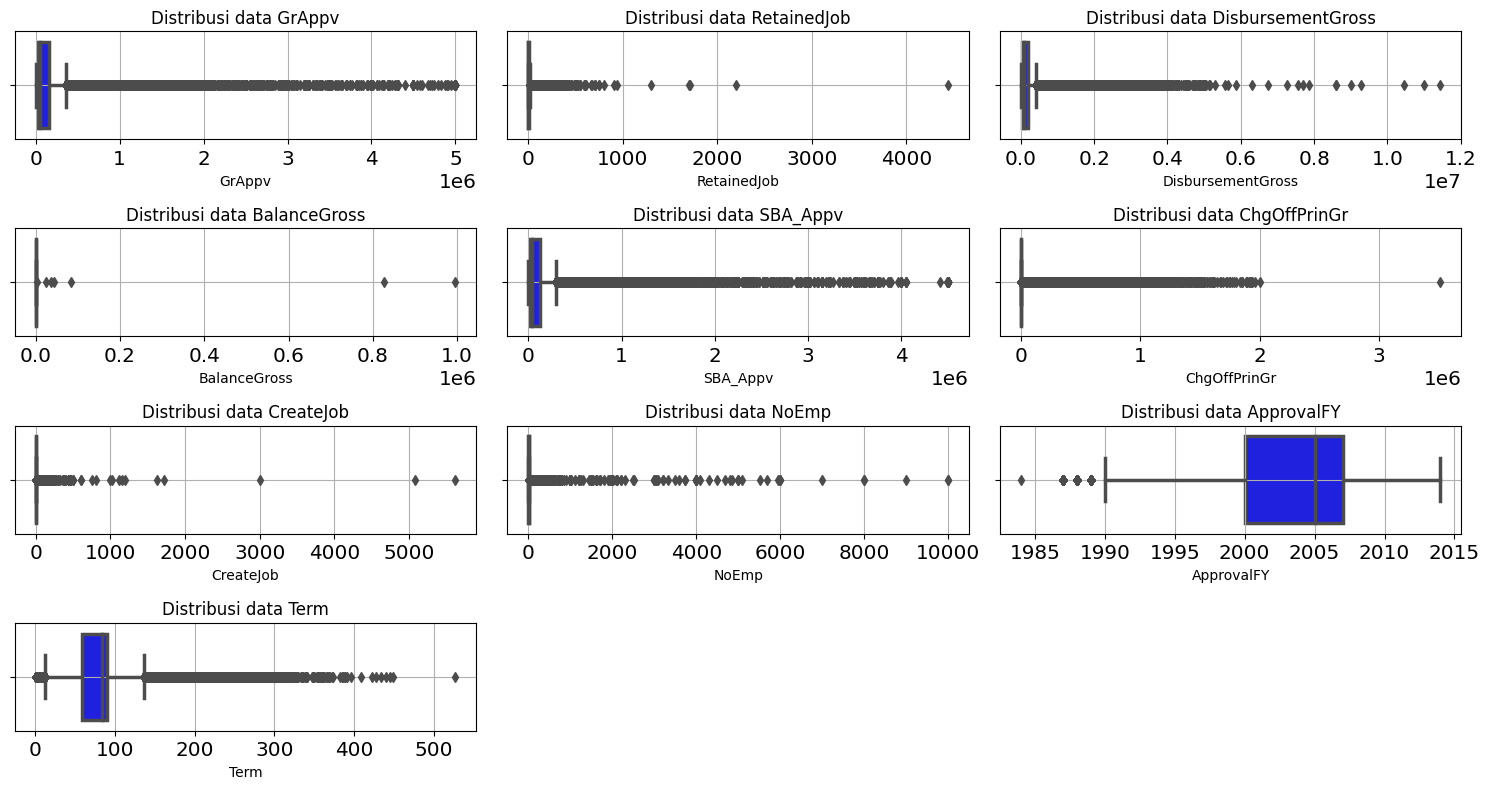

In [119]:
outliers = ['GrAppv', 'RetainedJob', 'DisbursementGross', 'BalanceGross', 'SBA_Appv', 'ChgOffPrinGr',
            'CreateJob', 'NoEmp', 'ApprovalFY', 'Term'
           ]

plt.figure(figsize=(15,8))

for i in range(0, len(outliers)):
    plt.subplot(4, 3, i+1)
    sns.boxplot(x=df[outliers[i]], color='blue')
    plt.xlabel(outliers[i])
    plt.grid()
    plt.title(f'Distribusi data {outliers[i]}')
    plt.tight_layout()

In [ ]:
## Fungsi untuk menghapus outliers

def del_outliers(data, columns):
    Q1 = np.percentile(data[columns], 25, interpolation='midpoint')
    Q3 = np.percentile(data[columns], 75, interpolation='midpoint')
    IQR = Q3 - Q1
    print('sebelum dihapus', data[columns].shape)
    lower = data[columns] <= (Q1 - 1.5 * IQR)
    upper = data[columns] >= (Q3 + 1.5 * IQR)
    data_fix = data[(~upper) & (~lower)]
    print('sesudah dihapus', data_fix[columns].shape)
    return data_fix

In [ ]:
df['GrAppv'].shape

(456239,)

In [ ]:
df=del_outliers(df, 'CreateJob')
df.shape

sebelum dihapus (456239,)
sesudah dihapus (387552,)


(387552, 35)

<Axes: xlabel='CreateJob'>

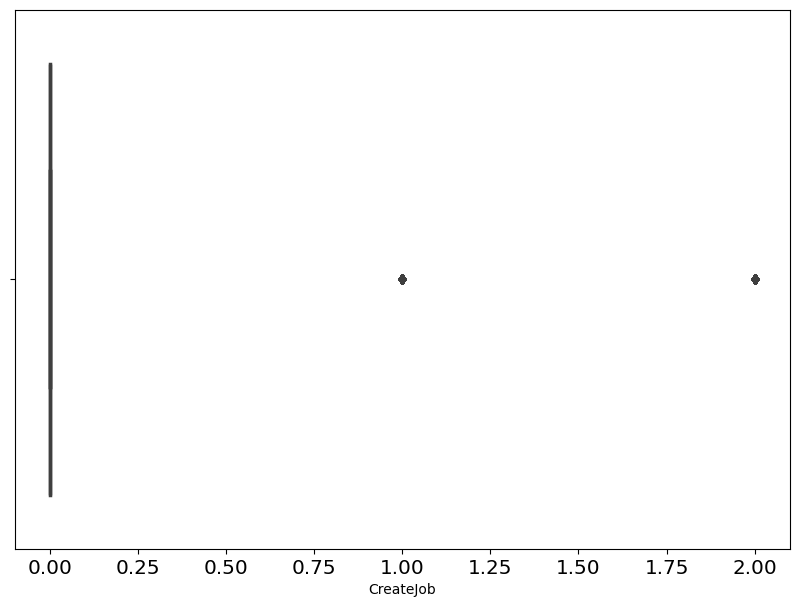

In [ ]:
sns.boxplot(x=df['CreateJob'])

In [120]:
numerical = ['Term', 'NoEmp', 'CreateJob', 'RetainedJob', 'DisbursementGross',
             'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv'
            ]

categorical = ['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
               'NAICS', 'NewExist', 'FranchiseCode', 'UrbanRural', 'RevLineCr', 'LowDoc',
               'MIS_Status'
              ]

datetime = ['ApprovalDate', 'ApprovalFY', 'ChgOffDate', 'DisbursementDate']

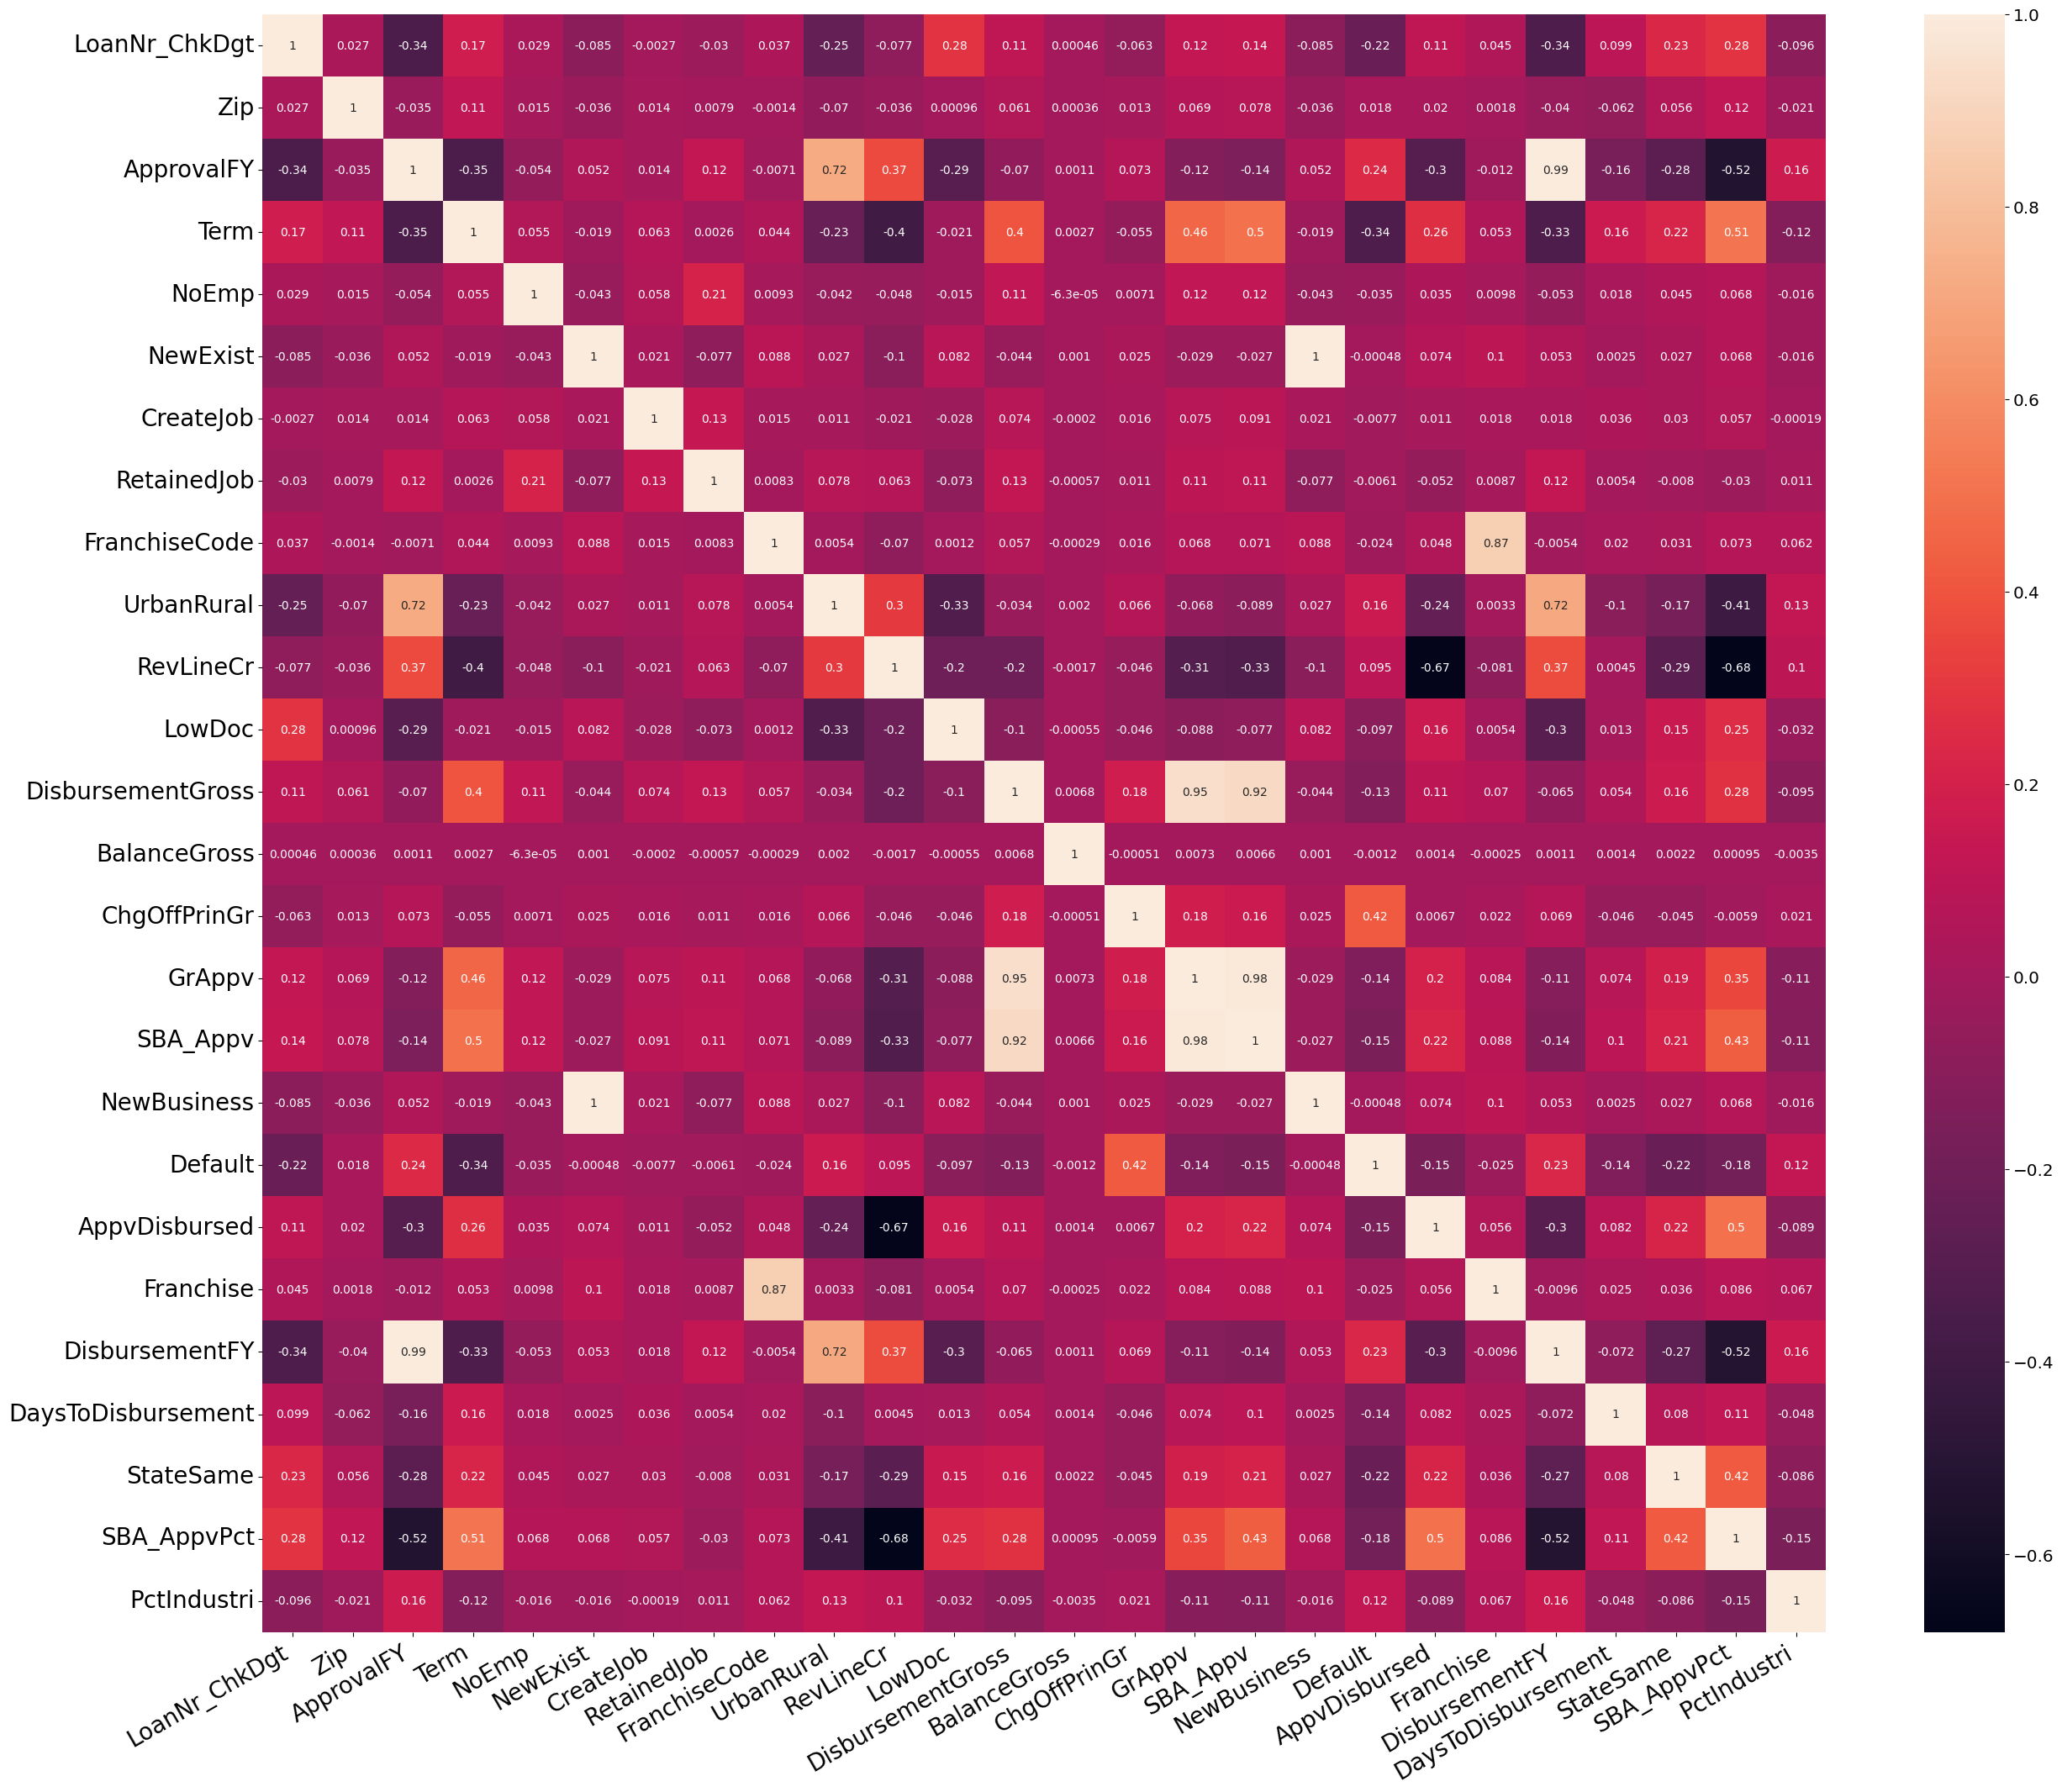

In [140]:
correlation_figure, correlation_axis = plt.subplots(figsize = (30,25))
corr_mtrx = df.corr()
correlation_axis = sns.heatmap(corr_mtrx, annot= True)

plt.xticks(rotation = 30, horizontalalignment = 'right', fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

## Feature selection

In [138]:
df.columns

Index(['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
       'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist',
       'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr',
       'LowDoc', 'DisbursementDate', 'DisbursementGross', 'BalanceGross',
       'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv', 'NewBusiness',
       'Default', 'AppvDisbursed', 'Franchise', 'DisbursementFY',
       'DaysToDisbursement', 'StateSame', 'SBA_AppvPct', 'industri',
       'PctIndustri'],
      dtype='object')

**Alasan drop feature:**
1. 'LoanNr_ChkDgt': merupakan primary key
2. 'Name' : memiliki kardinalitas yang sangat tinggi dan hanya memuat informasi nama bisnis sehingga tidak dapat dijadikan prediktor target.
3. 'City', 'Zip' : memiliki kardinalitas yang sangat tinggi dan telah diwakilkan oleh state.
4. 'State' : memiliki kardinalitas yang tinggi dan telah digantikan oleh statesame.
5. 'Bank' : memiliki kardinalitas yang sangat tinggi dan hanya memuat informasi nama bank sehingga tidak dapat dijadikan prediktor target.
6. 'BankState' : memiliki kardinalitas yang tinggi dan telah digantikan oleh statesame.
7. 'NAICS' : digantikan oleh industri.
8. 'ApprovalDate' dan 'ApprovalFY' merujuk pada waktu pinjaman ketika disetujui sehingga tidak dapat menjadi preditor target.
9. 'FranchiseCode: memiliki kardinalitas yang tinggi dan telah digantikan oleh Franchise
10. 'ChgOffDate': 75% data pada feature berisi null value, feature ini menunjukkan tanggal ketika peminjaman dinyatan gagal.
11. 'MIS_Status': digantikan Default
12. 'GrAppv' dan 'SBA_Appv': digantikan SBAApvPct
13. 'Industry': digantikan PctIndustri


In [ ]:
## Drop kolom yang sudah di encoding
df_new = df.drop(columns=[''])

## Handling Imbalance

In [56]:
df1=df

In [57]:
df1.drop(columns=['LoanNr_ChkDgt', 'Name', 'City', 'Zip', 'Bank', 'NAICS', 'ApprovalDate', 'NewExist', 'FranchiseCode',
                       'DisbursementDate', 'BalanceGross', 'ChgOffPrinGr', 'SBA_Appv', 'MIS_Status', 'State', 'BankState', 'industri'], inplace=True)

In [58]:
df1.sample(5)

,ApprovalFY,Term,NoEmp,CreateJob,RetainedJob,UrbanRural,RevLineCr,LowDoc,DisbursementGross,GrAppv,NewBusiness,Default,DaysToDisbursement,DisbursementFY,StateSame,SBA_AppvPct,AppvDisbursed,Franchise
559643,2002,84,12,0,0,2,0,0,250000.0,250000.0,0,0,60,2002,1,0.75,1,0
288891,2008,84,3,0,3,1,0,0,100000.0,100000.0,1,0,17,2008,1,0.50,1,0
546555,2002,40,10,2,10,1,1,0,70000.0,70000.0,0,0,36,2002,1,0.50,1,0
326821,2009,300,3,3,3,1,0,0,990000.0,1020000.0,0,0,48,2008,1,0.75,0,0
99024,1998,41,4,0,0,0,0,0,219000.0,230000.0,0,1,51,1998,0,0.75,0,0


In [59]:
X = df1.drop(['Default'], axis=1)
y = df1['Default']

In [60]:
y.value_counts()

0    358374
1     97865
Name: Default, dtype: int64

<Axes: ylabel='Default'>

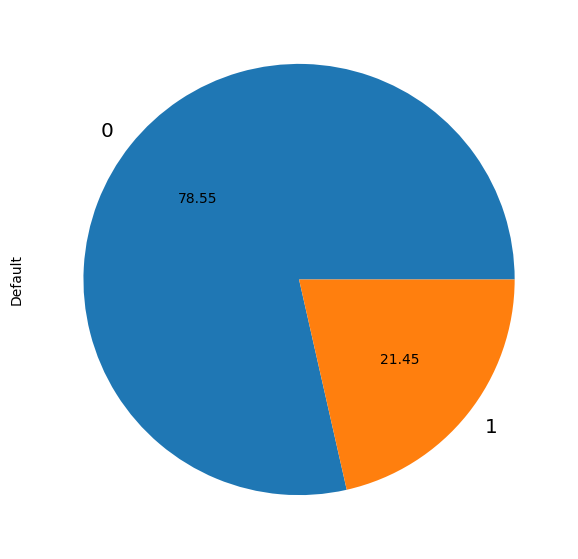

In [61]:
y.value_counts().plot.pie(autopct='%.2f')

In [62]:
from imblearn import over_sampling

X_over_smote, y_over_smote = over_sampling.SMOTE().fit_resample(X, y)

<Axes: ylabel='Default'>

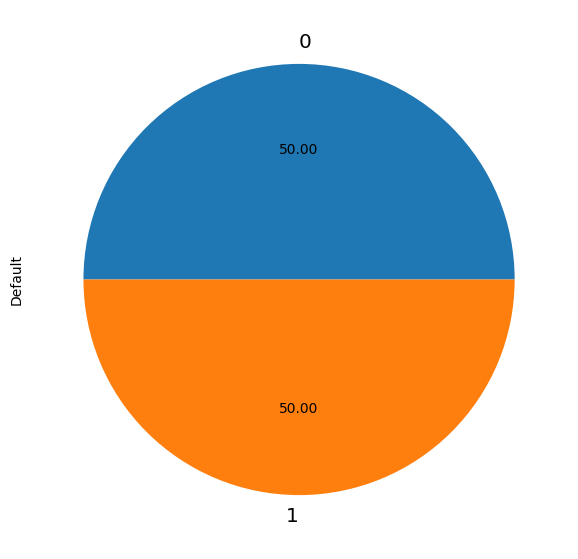

In [63]:
y_over_smote.value_counts().plot.pie(autopct='%.2f')

In [64]:
y_over_smote.value_counts()

0    358374
1    358374
Name: Default, dtype: int64